<a href="https://colab.research.google.com/github/cddogaru/Inteligencia-Artificial---Aprendizaje-Supervisado/blob/main/Aprendizaje_Supervisado_Clasificador_de_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Modulos Necesarios

In [4]:
# Manejo de vectores y tablas:
import numpy as np
import pandas as pd

# Manejo de cadenas de caracteres y regex:
import string as s
import re

# Natural Languaje Toolkit:
import nltk
from nltk.corpus import stopwords

# Herramientas de visualizacion:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Nube de palabras:
from wordcloud import WordCloud

# Modelos de aprendizaje supervisado:
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [5]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [6]:
!pip freeze

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy=

# Cargar Datos

Tenemos dos archivos con noticias clasificadas en 4 categorias:

1: Noticias del Mundo

2: Deportes

3: Negocios

4: Ciencia y Tecnologia

Los archivos train.cvs y test.csv contienen el texto de la noticia y la etiqueta de la categoria a la que perternecen. Vamos a cargar sus datos en dos dataframes de pandas, entrenamiento y prueba:

In [7]:
import pandas as pd

# URLs de los archivos en GitHub
url_train = 'https://raw.githubusercontent.com/cddogaru/Inteligencia-Artificial---Aprendizaje-Supervisado/main/train.csv'
url_test = 'https://raw.githubusercontent.com/cddogaru/Inteligencia-Artificial---Aprendizaje-Supervisado/main/test.csv'

# Cargar los datos desde las URLs
entrenamiento = pd.read_csv(url_train,
                            header=0,
                            names=['categoria', 'titular', 'texto'])

prueba = pd.read_csv(url_test,
                     header=0,
                     names=['categoria', 'titular', 'texto'])

# Verificar que los datos se han cargado correctamente
print("Datos de entrenamiento:")
print(entrenamiento.head())

print("\nDatos de prueba:")
print(prueba.head())

Datos de entrenamiento:
   categoria                                            titular  \
0          3  Wall St. Bears Claw Back Into the Black (Reuters)   
1          3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2          3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3          3  Iraq Halts Oil Exports from Main Southern Pipe...   
4          3  Oil prices soar to all-time record, posing new...   

                                               texto  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  

Datos de prueba:
   categoria                                            titular  \
0          3                  Fears for T N pension after talks   
1          4  The Race is On: Second Private Team Sets Launc...   
2          4      Ky. Co

In [8]:
entrenamiento

categoria                                            titular  \
0               3  Wall St. Bears Claw Back Into the Black (Reuters)   
1               3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2               3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               3  Iraq Halts Oil Exports from Main Southern Pipe...   
4               3  Oil prices soar to all-time record, posing new...   
...           ...                                                ...   
119995          1  Pakistan's Musharraf Says Won't Quit as Army C...   
119996          2                  Renteria signing a top-shelf deal   
119997          2                    Saban not going to Dolphins yet   
119998          2                                  Today's NFL games   
119999          2                       Nets get Carter from Raptors   

                                                    texto  
0       Reuters - Short-sellers, Wall Street's dwindli...  
1       Reuters - Private investment firm Carlyle Grou...  
2       Reuters - Soaring crude prices plus worries\ab...  
3       Reuters - Authorities have halted oil export\f...  
4       AFP - Tearaway world oil prices, toppling reco...  
...                                                   ...  
119995   KARACHI (Reuters) - Pakistani President Perve...  
119996  Red Sox general manager Theo Epstein acknowled...  
119997  The Miami Dolphins will put their courtship of...  
119998  PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...  
119999  INDIANAPOLIS -- All-Star Vince Carter was trad...  

[120000 rows x 3 columns]

In [9]:
# Una noticia de ejemplo:
entrenamiento['texto'][200]

'Computer games can promote problem-solving and team-building in children, say games industry experts.'

In [10]:
entrenamiento['categoria'][200]

4

In [11]:
prueba

categoria                                            titular  \
0             3                  Fears for T N pension after talks   
1             4  The Race is On: Second Private Team Sets Launc...   
2             4      Ky. Company Wins Grant to Study Peptides (AP)   
3             4      Prediction Unit Helps Forecast Wildfires (AP)   
4             4        Calif. Aims to Limit Farm-Related Smog (AP)   
...         ...                                                ...   
7595          1                                   Around the world   
7596          2                        Void is filled with Clement   
7597          2                             Martinez leaves bitter   
7598          3  5 of arthritis patients in Singapore take Bext...   
7599          3                             EBay gets into rentals   

                                                  texto  
0     Unions representing workers at Turner   Newall...  
1     SPACE.com - TORONTO, Canada -- A second\team o...  
2     AP - A company founded by a chemistry research...  
3     AP - It's barely dawn when Mike Fitzpatrick st...  
4     AP - Southern California's smog-fighting agenc...  
...                                                 ...  
7595  Ukrainian presidential candidate Viktor Yushch...  
7596  With the supply of attractive pitching options...  
7597  Like Roger Clemens did almost exactly eight ye...  
7598  SINGAPORE : Doctors in the United States have ...  
7599  EBay plans to buy the apartment and home renta...  

[7600 rows x 3 columns]

In [12]:
train_x = entrenamiento.texto
test_x = prueba.texto

train_y = entrenamiento.categoria
test_y = prueba.categoria

In [13]:
train_x

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995     KARACHI (Reuters) - Pakistani President Perve...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: texto, Length: 120000, dtype: object

In [14]:
train_y

0         3
1         3
2         3
3         3
4         3
         ..
119995    1
119996    2
119997    2
119998    2
119999    2
Name: categoria, Length: 120000, dtype: int64

# Visualizacion de Datos

Podemos visualizar cuantas noticias hay por categoria. Si hubiese muchas menos noticias de una categoria en concreto tendriamos un grupo de datos desequilibrado. En este caso parece que las etiquetas de las noticias estan equilibradas:

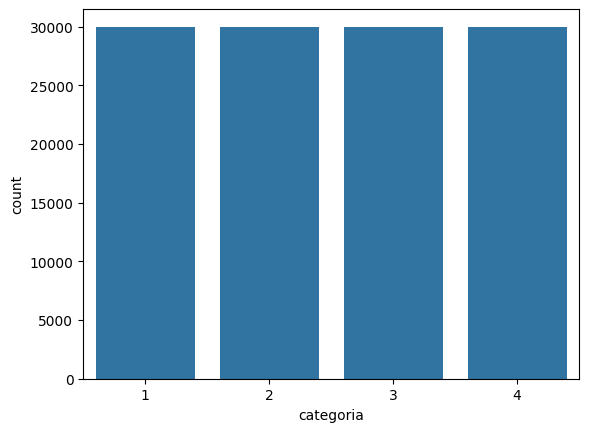

In [15]:
df = entrenamiento
sns.countplot(x=df.categoria);

Podemos construir una nube de palabras para la categoria "mundo" y observar que palabras tienen mayor presencia:

In [16]:
mundo = df.texto[ df.categoria[df.categoria==1].index]

In [17]:
mundo

492       Reuters - Venezuelans turned out early\and in ...
493       Reuters - South Korean police used water canno...
494       Reuters - Thousands of Palestinian\prisoners i...
495       AFP - Sporadic gunfire and shelling took place...
496       AP - Dozens of Rwandan soldiers flew into Suda...
                                ...                        
119990    AP - U.S. Sen.-elect Barack Obama, whose 1995 ...
119992     BAGHDAD (Reuters) - As if the daily struggle ...
119993     ABUJA (Reuters) - The African Union said on S...
119994     BEIRUT (Reuters) - Syria, under intense press...
119995     KARACHI (Reuters) - Pakistani President Perve...
Name: texto, Length: 30000, dtype: object

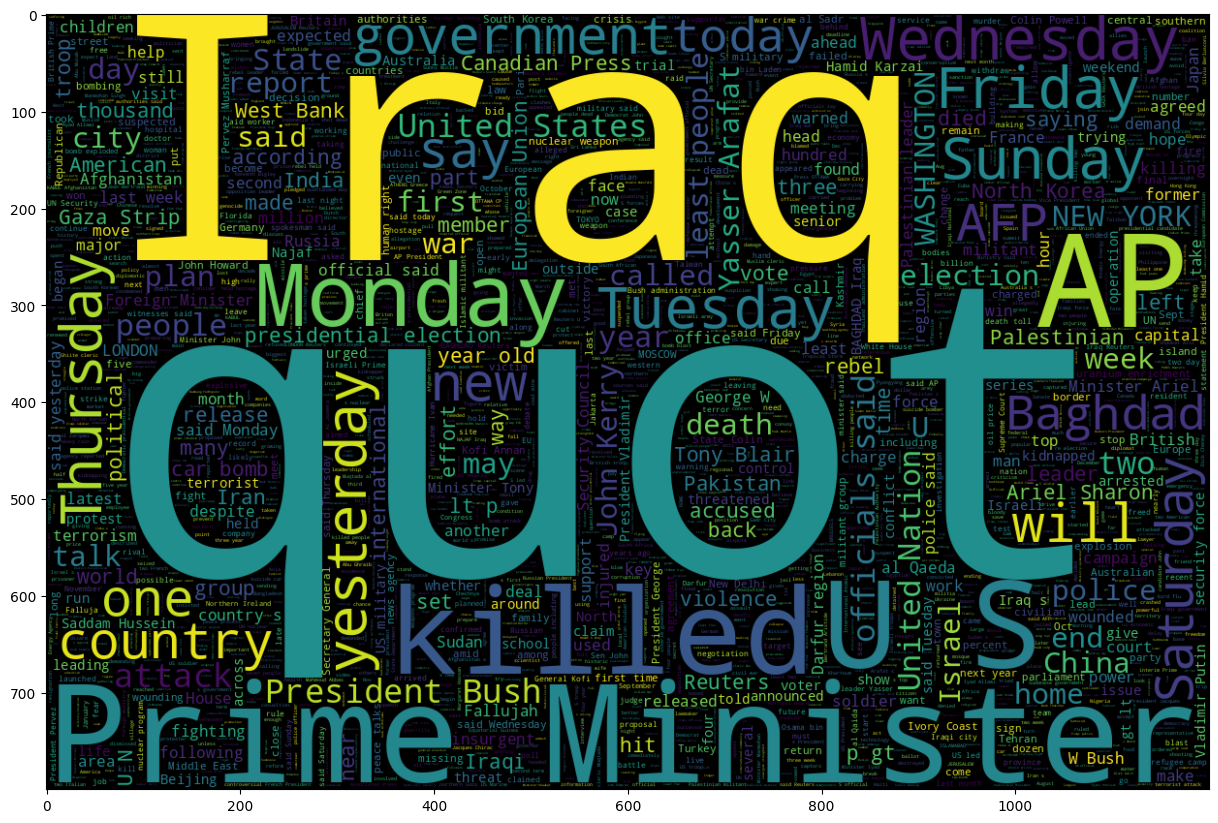

In [18]:
plt.figure(figsize = (15,20));
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(" ".join(mundo))

plt.imshow(nube, interpolation='bilinear');

¿Podrias construir las nubes para el resto de categorias? Que las nuevas nubes tengan como maximo 500, 600 y 1000 palabras cada una.

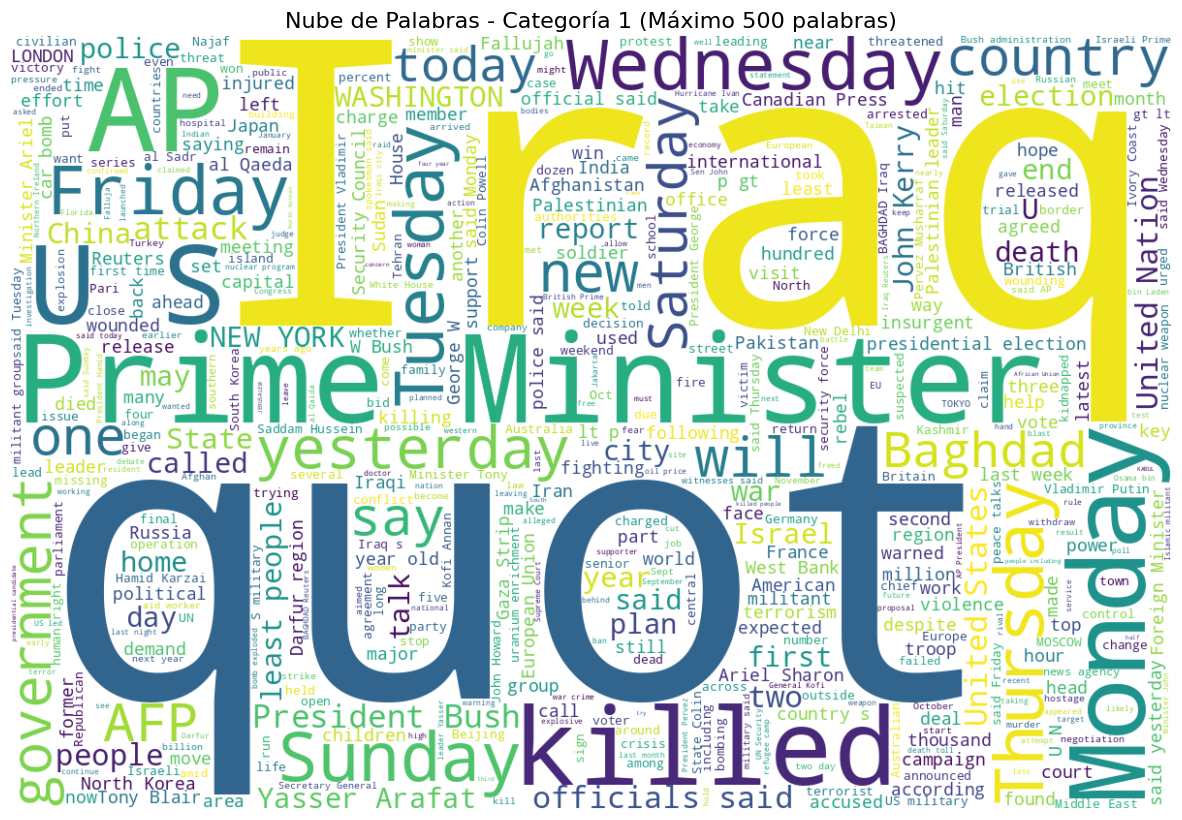

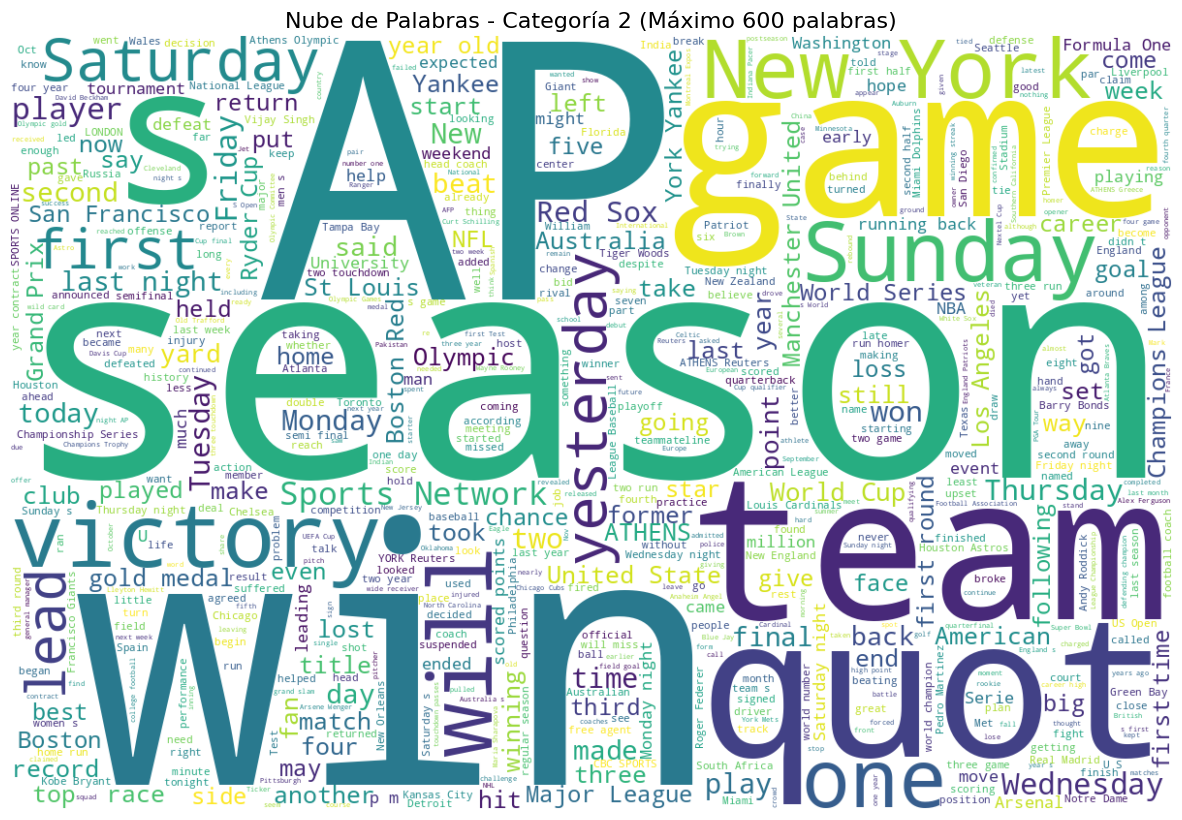

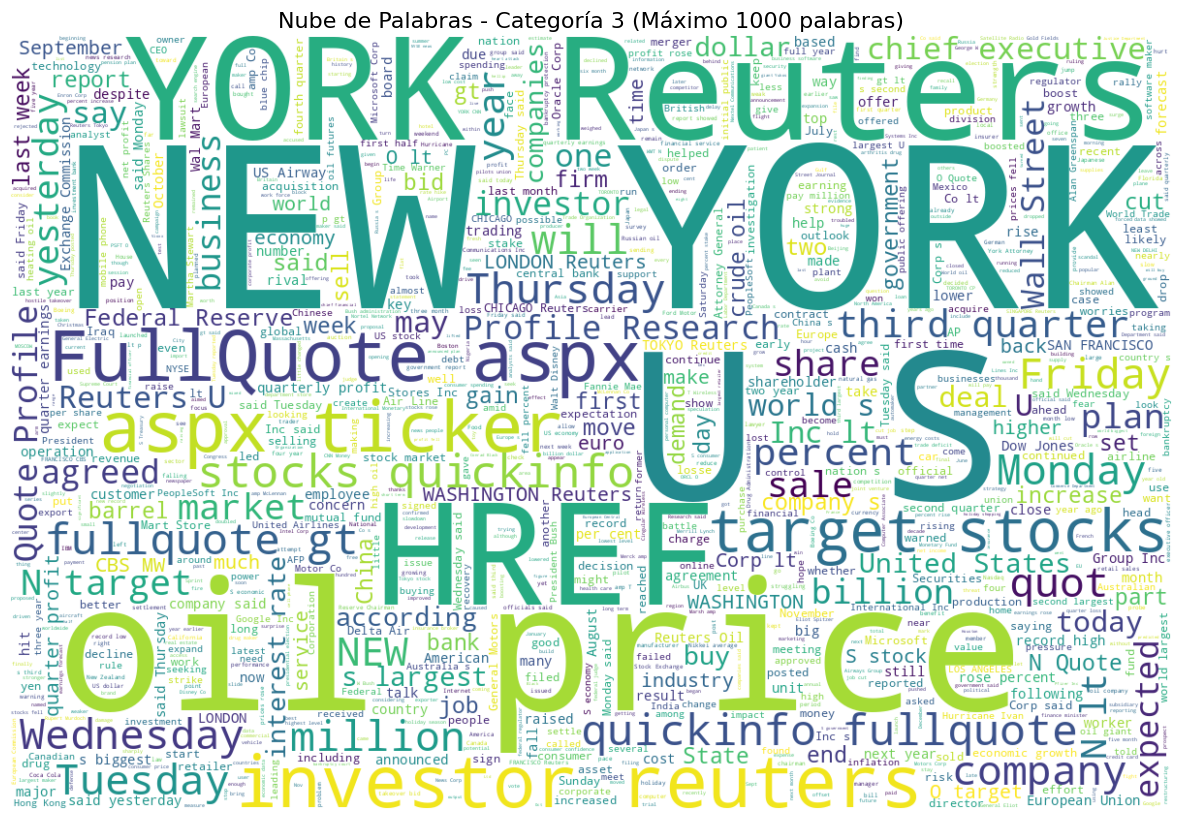

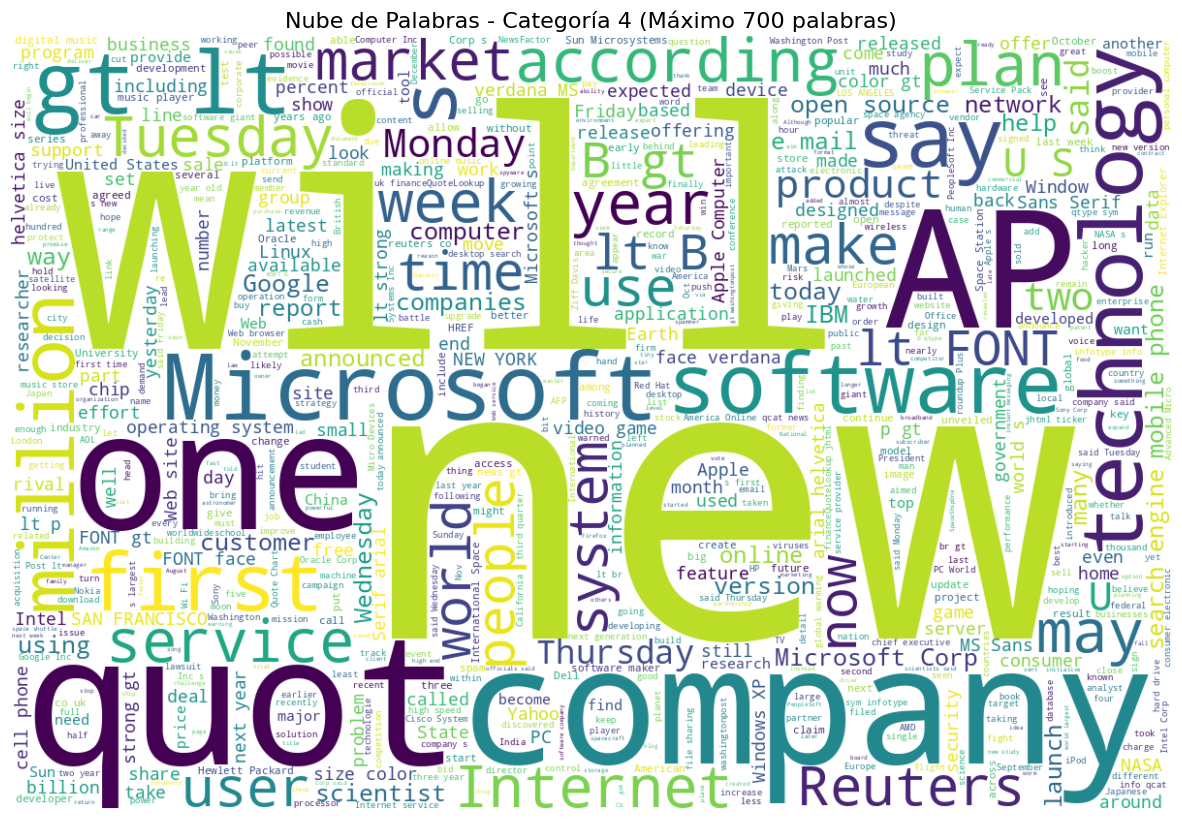

In [19]:
from wordcloud import WordCloud

# Lista de categorías y sus correspondientes límites de palabras para las nubes
categorias = [1, 2, 3, 4]
limites_palabras = [500, 600, 1000, 700]  # Personaliza los máximos de palabras

# Iterar sobre las categorías y generar una nube de palabras para cada una
for i, max_words in zip(categorias, limites_palabras):
    # Filtrar el texto de la categoría actual
    categoria_texto = df.texto[df.categoria[df.categoria == i].index]
    # Concatenar los textos de la categoría
    texto_concatenado = ' '.join(categoria_texto)

    # Crear la nube de palabras
    nube = WordCloud(
        min_font_size=3,
        max_words=max_words,
        width=1200,
        height=800,
        background_color='white'
    ).generate(texto_concatenado)

    # Visualizar la nube de palabras
    plt.figure(figsize=(15, 20))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras - Categoría {i} (Máximo {max_words} palabras)', fontsize=16)
    plt.show()

#Tokenizacion

Para que nuestro modelo pueda aprender, debemos limpiar los datos, el primer paso es separar los textos en palabras individuales (tokens, tokenizar).

In [20]:
def tokenizar(texto):
    tokens = texto.split()
    return tokens

train_x = train_x.apply(tokenizar)
test_x = test_x.apply(tokenizar)

In [21]:
train_x[200]

['Computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

In [22]:
train_x[0]

['Reuters',
 '-',
 'Short-sellers,',
 'Wall',
 "Street's",
 'dwindling\\band',
 'of',
 'ultra-cynics,',
 'are',
 'seeing',
 'green',
 'again.']

# Conversion a minisculas:

El computador confundiria A con a, las palabras en mayusculas al inicio de una frase mantienen el mismos significado (semantica) aunque se representen de manera diferente. Convertimos todas las palabras a caracteres en minuscula.

In [23]:
def hacer_minusculas(tokens):
    nuevos_tokens=[]
    for t in tokens:
        t = t.lower()
        nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(hacer_minusculas)
test_x = test_x.apply(hacer_minusculas)

In [24]:
train_x[0]

['reuters',
 '-',
 'short-sellers,',
 'wall',
 "street's",
 'dwindling\\band',
 'of',
 'ultra-cynics,',
 'are',
 'seeing',
 'green',
 'again.']

In [25]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

# Eliminar Puntuacion

Los simbolos de puntuacion tambien puede hacer que sea mas dificil la compresion del texto para la maquina. Podemos eliminar de cada token los simbolos especiales. Algunos de estos simbolos pueden tener significado, se podria limpiar el texto de cada token de una manera mas elaborada para intentar preservar este significado.

In [26]:
def eliminar_simbolos(tokens):
    nuevos_tokens = []
    for t in tokens:
        for simbolo in s.punctuation:
            t = t.replace(simbolo, '')
        nuevos_tokens.append(t)
    return nuevos_tokens


train_x = train_x.apply(eliminar_simbolos)
test_x = test_x.apply(eliminar_simbolos)

Los simbolos de puntuacion estan recogidos en string.punctuation:

In [27]:
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
train_x[0]

['reuters',
 '',
 'shortsellers',
 'wall',
 'streets',
 'dwindlingband',
 'of',
 'ultracynics',
 'are',
 'seeing',
 'green',
 'again']

In [29]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problemsolving',
 'and',
 'teambuilding',
 'in',
 'children',
 'say',
 'games',
 'industry',
 'experts']

¿De que otras maneras podriamos realizar la limpieza de los simbolos de puntuacion?

In [30]:
import re
import string

# Función alternativa usando string.punctuation
def eliminar_puntuacion_1(tokens):
    """
    Esta función elimina los símbolos de puntuación usando string.punctuation.
    """
    nuevos_tokens = [t for t in tokens if t not in string.punctuation]
    return nuevos_tokens

# Función alternativa usando expresiones regulares (re)
def eliminar_puntuacion_2(tokens):
    """
    Esta función elimina los símbolos de puntuación usando expresiones regulares.
    """
    nuevos_tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens]  # Sustituye caracteres no alfanuméricos por vacío.
    return nuevos_tokens

# Función alternativa para eliminar cualquier símbolo no deseado
def eliminar_puntuacion_3(tokens):
    """
    Elimina caracteres no alfanuméricos y normaliza espacios en blanco.
    """
    nuevos_tokens = [re.sub(r'[^a-zA-Z0-9]', '', t) for t in tokens]  # Permite solo letras y números.
    nuevos_tokens = [t for t in nuevos_tokens if t]  # Elimina tokens vacíos.
    return nuevos_tokens

# Aplicar las funciones a train_x y test_x (puedes probar cada una por separado)
train_x = train_x.apply(eliminar_puntuacion_2)  # Cambiar a _1, _2 o _3 para probar diferentes enfoques.
test_x = test_x.apply(eliminar_puntuacion_2)

# Ejemplo de inspección
print(train_x[0])  # Muestra el resultado después de aplicar la limpieza
print(train_x[200])  # Muestra el resultado de otro ejemplo

['reuters', '', 'shortsellers', 'wall', 'streets', 'dwindlingband', 'of', 'ultracynics', 'are', 'seeing', 'green', 'again']
['computer', 'games', 'can', 'promote', 'problemsolving', 'and', 'teambuilding', 'in', 'children', 'say', 'games', 'industry', 'experts']


# Eliminar Numeros

La presencia de numeros puede distorsionar el significado. Como tratamiento sencillo se pueden, simplemente, eliminar:

In [31]:
def eliminar_numeros(tokens):
    sin_numeros = []
    nuevos_tokens = []

    for t in tokens:
        for digito in s.digits:
            t = t.replace(digito, '')
        sin_numeros.append(t)

    for t in sin_numeros:
        if t != '':
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x=train_x.apply(eliminar_numeros)
test_x=test_x.apply(eliminar_numeros)

In [32]:
s.digits

'0123456789'

In [33]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, have, halted, oil, expo...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time, pm, line, s...
119999    [indianapolis, allstar, vince, carter, was, tr...
Name: texto, Length: 120000, dtype: object

In [34]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problemsolving',
 'and',
 'teambuilding',
 'in',
 'children',
 'say',
 'games',
 'industry',
 'experts']

# Eliminar Palabras Invariables (Stopwords)

Eliminamos aquellas palabras que carecen de significado propio:

In [35]:
nltk.download('stopwords')

def quitar_paradas(tokens):
    invariables = stopwords.words('english')
    nuevos_tokens = []
    for t in tokens:
        if t not in invariables:
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(quitar_paradas)
test_x = test_x.apply(quitar_paradas)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [38]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, halted, oil, exportflow...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphins, put, courtship, lsu, coach, ...
119998    [pittsburgh, ny, giants, time, pm, line, steel...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [39]:
train_x[200]

['computer',
 'games',
 'promote',
 'problemsolving',
 'teambuilding',
 'children',
 'say',
 'games',
 'industry',
 'experts']

# Extraer las Raices

Como las palabras variantes, con significado, pueden tener variantes con el mismo, o similar, significado, podemos extraer las raices de la palabra:

In [40]:
nltk.download('wordnet')
lematizador = nltk.stem.WordNetLemmatizer()

def lematizar(tokens):
    nuevos_tokens = []
    for t in tokens:
        t = lematizador.lemmatize(t)
        nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(lematizar)
test_x = test_x.apply(lematizar)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
train_x

0         [reuters, shortsellers, wall, street, dwindlin...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, price, plus, worries...
3         [reuters, authority, halted, oil, exportflows,...
4         [afp, tearaway, world, oil, price, toppling, r...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, pm, line, steele...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [42]:
train_x[200]

['computer',
 'game',
 'promote',
 'problemsolving',
 'teambuilding',
 'child',
 'say',
 'game',
 'industry',
 'expert']

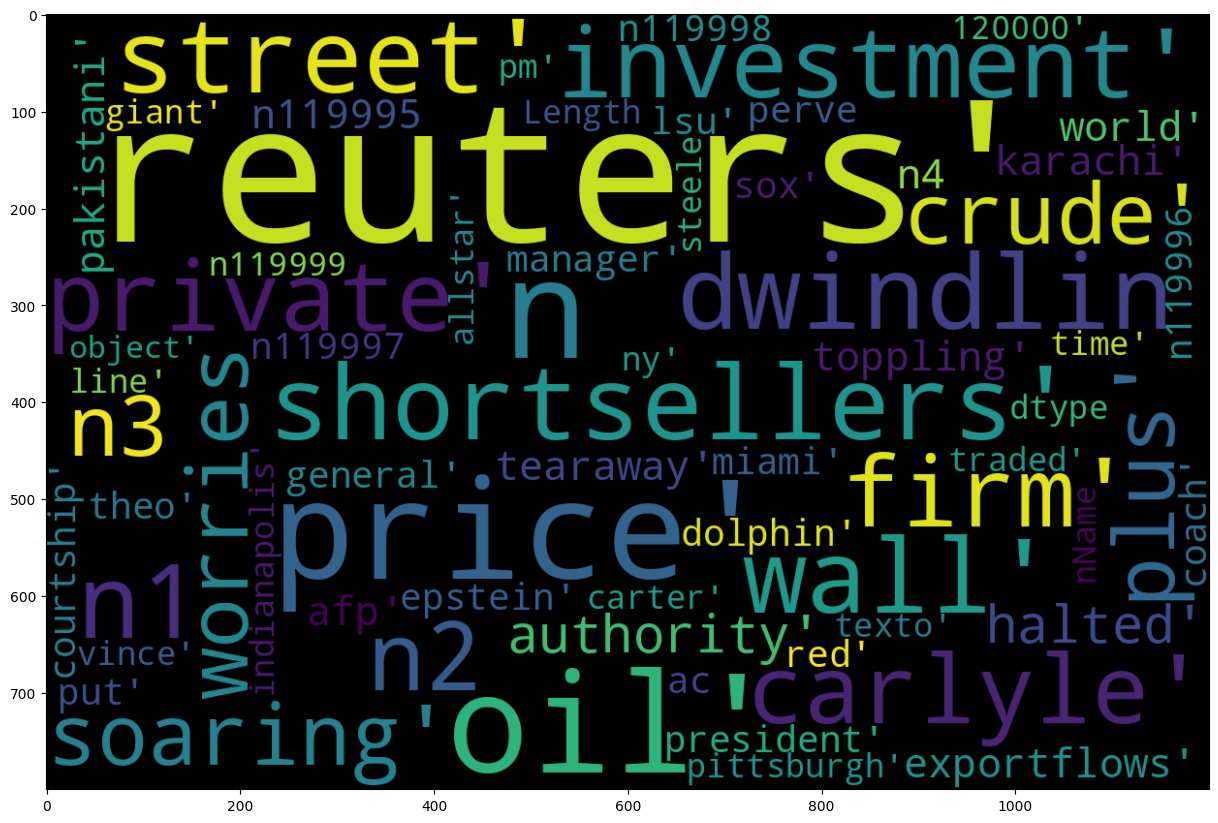

In [43]:
plt.figure(figsize=(15, 20));
textos_limpios = str(str(train_x).split(','))
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(textos_limpios)
plt.imshow(nube, interpolation='bilinear');

In [44]:
textos_limpios

"['0         [reuters', ' shortsellers', ' wall', ' street', ' dwindlin...\\n1         [reuters', ' private', ' investment', ' firm', ' carlyle', ' ...\\n2         [reuters', ' soaring', ' crude', ' price', ' plus', ' worries...\\n3         [reuters', ' authority', ' halted', ' oil', ' exportflows', '...\\n4         [afp', ' tearaway', ' world', ' oil', ' price', ' toppling', ' r...\\n                                ...                        \\n119995    [karachi', ' reuters', ' pakistani', ' president', ' perve...\\n119996    [red', ' sox', ' general', ' manager', ' theo', ' epstein', ' ac...\\n119997    [miami', ' dolphin', ' put', ' courtship', ' lsu', ' coach', ' n...\\n119998    [pittsburgh', ' ny', ' giant', ' time', ' pm', ' line', ' steele...\\n119999    [indianapolis', ' allstar', ' vince', ' carter', ' traded', '...\\nName: texto', ' Length: 120000', ' dtype: object']"

La nube de arriba contiene ciertos elementos que no son palabras y algunos caracteres extra. ¿Podrias limpiar train_x y test_x y mostrar su nube de palabras sin estos caracteres?

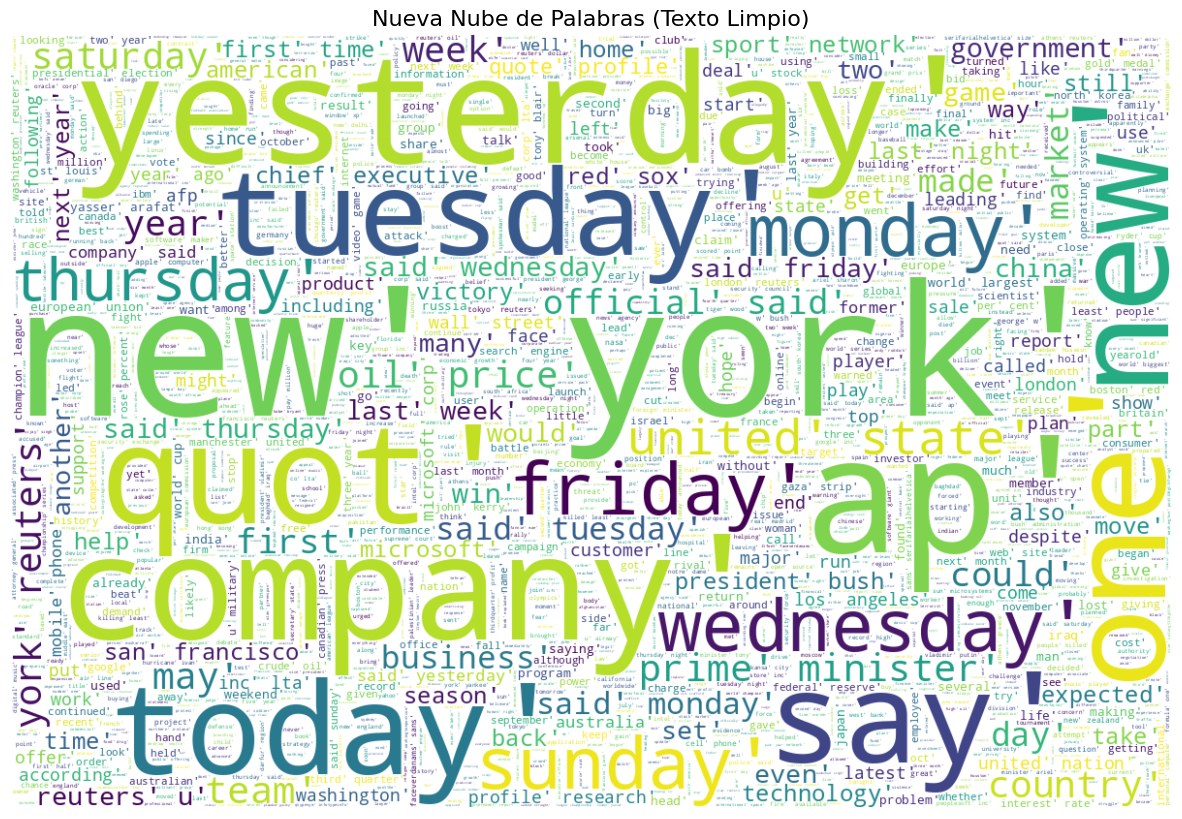

In [45]:
import re

# Función para limpiar texto eliminando caracteres no deseados
def limpiar_texto(tokens):
    """
    Limpia una lista de tokens eliminando caracteres no deseados
    como '\n', números de índice, y caracteres especiales.
    """
    nuevos_tokens = []
    for t in tokens:
        # Eliminar caracteres no alfanuméricos (excepto letras y números)
        limpio = re.sub(r'[^a-zA-Z]', '', t)
        if limpio:  # Agregar si no está vacío
            nuevos_tokens.append(limpio)
    return nuevos_tokens

# Aplicar la función a train_x y test_x
train_x = train_x.apply(limpiar_texto)
test_x = test_x.apply(limpiar_texto)

# Generar nueva nube de palabras con texto limpio
textos_limpios = str(train_x.tolist()).replace(",", " ")
nube = WordCloud(
    min_font_size=3,
    max_words=2500,
    width=1200,
    height=800,
    background_color="white"
).generate(textos_limpios)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 20))
plt.imshow(nube, interpolation='bilinear')
plt.axis("off")
plt.title("Nueva Nube de Palabras (Texto Limpio)", fontsize=16)
plt.show()

In [46]:
del textos_limpios

# Extraccion de Caracteristicas

Es muy complicado hacer que la maquina entienda las palabras a traves de la lectura de sus fonemas o representacion en caracteres. Para ello tenemos que vectorizar (embeber) las palabras completas dentro de su contexto. En este caso utilizaremos una tecnica sencilla de frecuencia de palabras en cada documento:

In [47]:
train_x = train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x = test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [48]:
train_x[200]

'computer game promote problemsolving teambuilding child say game industry expert '

In [49]:
test_x[0]

'union representing worker turner newall say disappointed talk stricken parent firm federal mogul '

In [50]:
# Para reducir carga de RAM, se puede reducir el numero
# de caracteristicas maximas. N=5000 o 10000
vectorizador = TfidfVectorizer(max_features=5000, min_df=6)

train_1 = vectorizador.fit_transform(train_x)
test_1 = vectorizador.transform(test_x)
#vectorizador.predict

print("Numero de caracteristicas extraidas.")
print(len(vectorizador.get_feature_names_out()))
print(vectorizador.get_feature_names_out()[:20])

train_arr = train_1.toarray()
test_arr = test_1.toarray()

Numero de caracteristicas extraidas.
5000
['aaron' 'abandon' 'abandoned' 'abbas' 'abbey' 'abc' 'abducted' 'abdullah'
 'abidjan' 'ability' 'able' 'aboard' 'abroad' 'absence' 'abu' 'abuja'
 'abuse' 'abusing' 'ac' 'academic']


In [51]:
vectorizador.get_feature_names_out()[1807]

'gambling'

In [52]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(train_arr[200])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [53]:
print(len(train_arr[200]))

5000


In [54]:
np.count_nonzero(train_arr[200])

7

In [55]:
for i in [200, 201, 202, 203, 204, 205]:
  print(train_x[i])
  print("Indice del maximo: ", np.argmax(train_arr[i]))
  max_pos = np.argmax(train_arr[i])
  print("Valor del maximo: ", train_arr[i][max_pos])
  print("Palabras: ", np.count_nonzero(train_arr[i]))
  print("\n")

computer game promote problemsolving teambuilding child say game industry expert 
Indice del maximo:  1808
Valor del maximo:  0.5014932071042076
Palabras:  7


young people increasingly happy buy pirated good illegal download content net survey show 
Indice del maximo:  3228
Valor del maximo:  0.3573989577595032
Palabras:  13


catwoman game major disappointment feel like pointless tiein film 
Indice del maximo:  1270
Valor del maximo:  0.5322862302028221
Palabras:  6


providence ri reuters absenteeism little high tuesday among guy office ea sport would like think madden nfl came day fan football simulation rabid enough take sick day play 
Indice del maximo:  1137
Valor del maximo:  0.3213883380447466
Palabras:  20


new york reuters america online thursday said plan sell lowpriced pc targeting lowincome minority household agree sign year dialup internet service 
Indice del maximo:  2070
Valor del maximo:  0.346052539475797
Palabras:  18


seattle reuters microsoft corp ltmsftogt said

# Ejemplo Classificador: Arbol de Decision

Con las noticias vectorizadas podemos proceder a entrenar un modelo. En este caso un modelo de clasificador en arbol, que veremos en:

https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.

<Axes: >

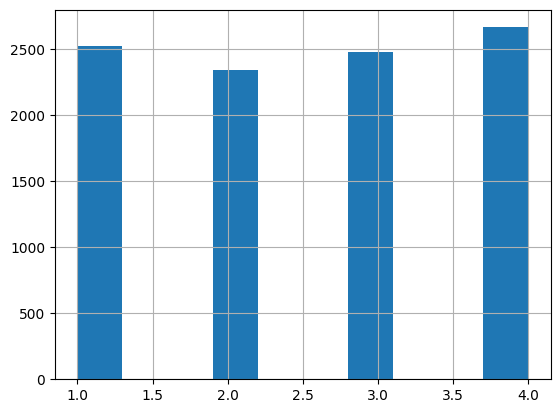

In [56]:
train_y[0:10000].hist()

In [57]:
arbol = DecisionTreeClassifier()

# Limitar los ejemplos por si tarda demasiado tiempo:
LIMITAR = True
if LIMITAR:
  N = 120000
  train_arr_cortado = train_arr[0:N]
  train_y_cortado = train_y[0:N]
else:
    train_arr_cortado = train_arr
    train_y_cortado = train_y

arbol.fit(train_arr_cortado, train_y_cortado)

DecisionTreeClassifier()

In [58]:
test_x[100]

'indian army major shot way country first ever individual olympic silver medal tuesday event member dubai ruling family became first ever medallist united arab emirate '

In [60]:
test_y[100]

2

In [61]:
arbol.predict([test_arr[100]])

array([2])

In [62]:
test_y[500]

4

In [63]:
test_x[7000]

'come touting company software oracle ceo larry ellison never one mince word principle free speech versus almighty dollar bad boy silicon valley veritable shrinking violet missing link '

In [64]:
pred = arbol.predict(test_arr)

In [65]:
pred = arbol.predict(test_arr)

print("Primeras 20 categorias reales:")
print(test_y.tolist()[:20])
print("Primeras 20 predicciones:")
print(pred.tolist()[:20])

Primeras 20 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Primeras 20 predicciones:
[3, 4, 4, 4, 1, 4, 4, 4, 3, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4]


In [66]:
test_x[17]

'european space agency esas mar express relayed picture one nasa mar rover first time part set interplanetary networking demonstration demonstration pave way future mar mission draw joint interplanetary networking capability '

Podemos evaluar el modelo respecto a varias metricas estadisticas:

In [67]:
def evaluar_modelo(y, y_pred):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores
    # multivariable.

    print("Puntuacion F1:")
    print(f1_score(y, y_pred, average='micro'))
    print("Precision:")
    print(accuracy_score(y, y_pred))
    print("Precision %:")
    print(round(accuracy_score(y, y_pred)*100, 3), "%")

In [68]:
evaluar_modelo(test_y, pred)

Puntuacion F1:
0.8043421052631579
Precision:
0.8043421052631579
Precision %:
80.434 %


In [69]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_y, pred, color):
    cof = confusion_matrix(test_y, pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True,
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);

    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

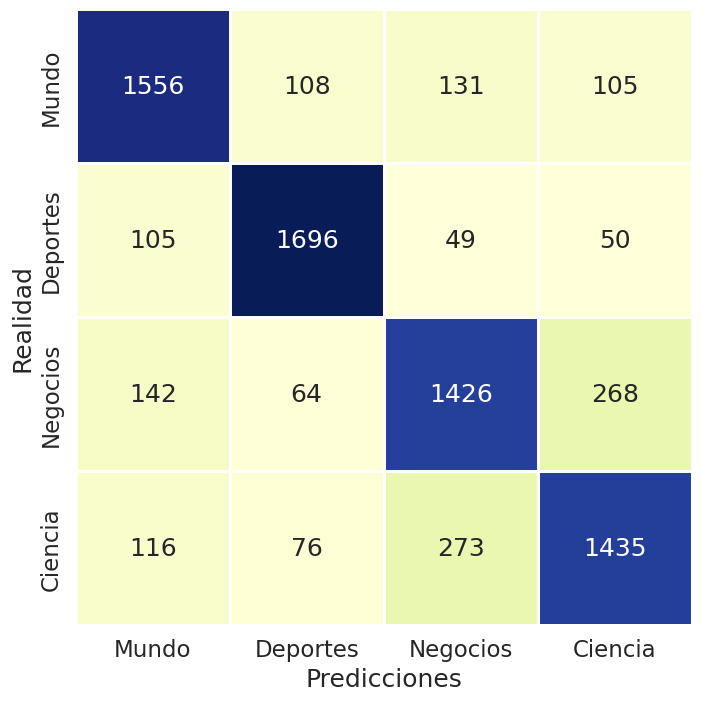

In [70]:
matriz_confusion(test_y, pred, 'YlGnBu')

In [71]:
noticia_nueva = "Pecco Bagnaia given bleak “he must climb Everest” title prediction"
noticia_vector = vectorizador.transform([noticia_nueva])
noticia_nueva_arr = noticia_vector.toarray()

In [72]:
arbol.predict(noticia_nueva_arr)

array([4])

Dados los siguientes modelos, ¿podrias entrenarlos y obtener predicciones?
¿Puedes crear una comparacion de las precisiones de cada uno de los modelos?

Modelos a entrenar y evaluar:

Clasificador Bayesiano Multinomial: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Clasificador Gausiano Gaussiano: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Descenso de Gradiente Estocastico: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Potenciador de Gradiente Ligero: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html


In [74]:
# Importamos los modelos de scikit-learn y LightGBM
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Creamos un diccionario con los modelos a entrenar y sus nombres
modelos = {
    "MultinomialNB": MultinomialNB(),  # Modelo Naive Bayes Multinomial
    "GaussianNB": GaussianNB(),       # Modelo Naive Bayes Gaussiano
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),  # Descenso de Gradiente Estocástico
    "LGBMClassifier": LGBMClassifier(n_estimators=100, random_state=42)        # Potenciador de Gradiente Ligero
}

# Diccionario para almacenar los resultados de precisión de cada modelo
resultados = {}

# Bucle para entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    print(f"Entrenando y evaluando: {nombre}")  # Mensaje informativo sobre el modelo que se está procesando

    if nombre == "GaussianNB":
        # GaussianNB ya puede trabajar directamente con matrices densas
        modelo.fit(train_arr, train_y)  # Entrenamos el modelo
        pred = modelo.predict(test_arr)  # Realizamos las predicciones sobre los datos de prueba
    else:
        # Los demás modelos pueden trabajar directamente con matrices dispersas
        modelo.fit(train_arr, train_y)  # Entrenamos el modelo con los datos de entrenamiento
        pred = modelo.predict(test_arr)  # Realizamos las predicciones sobre los datos de prueba

    # Calculamos la precisión del modelo en los datos de prueba
    precision = accuracy_score(test_y, pred)
    resultados[nombre] = precision  # Guardamos la precisión en el diccionario de resultados

    # Imprimimos la precisión obtenida para este modelo
    print(f"Precisión de {nombre}: {precision:.4f}")

# Mostramos un resumen comparativo de las precisiones de todos los modelos
print("\nResultados Comparativos:")
for modelo, precision in resultados.items():
    print(f"{modelo}: {precision:.4f}")  # Imprimimos el nombre del modelo y su precisión

Entrenando y evaluando: MultinomialNB
Precisión de MultinomialNB: 0.8792
Entrenando y evaluando: GaussianNB
Precisión de GaussianNB: 0.8434
Entrenando y evaluando: SGDClassifier
Precisión de SGDClassifier: 0.8921
Entrenando y evaluando: LGBMClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.719404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434241
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 5000
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precisión de LGBMClassifier: 0.8838

Resultados Comparativos:
MultinomialNB: 0.8792
GaussianNB: 0.8434
SGDClassifier: 0.8921
LGBMClassifier: 0.8838
